# FIR Windowing

In [33]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib widget
#%matplotlib inline

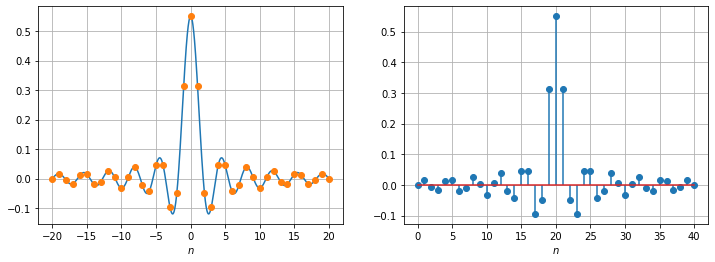

In [68]:
# Filtro pasabajos ideal truncado

fc = 0.275
wc = fc*2*np.pi

nd = 20
M = 2*nd + 1

n = np.arange(-nd,nd+1)
hn = (wc/np.pi)*np.sinc(wc/np.pi*n)

x = np.linspace(-nd,nd,1001)
h = (wc/np.pi)*np.sinc(wc/np.pi*x)

fig = plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.plot(x,h)
plt.plot(n,hn,'o')
plt.xlabel('$n$')
plt.grid('on')

plt.subplot(1,2,2)
plt.stem(hn)
plt.xlabel('$n$')
plt.grid('on')


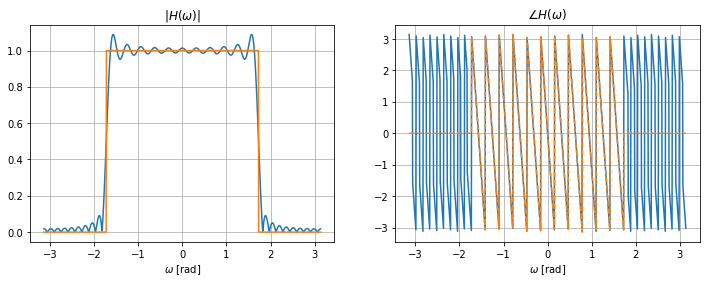

In [69]:
# Respuesta en frecuencia
N = 1024
Hw = np.fft.fft(hn,N)
Hw = np.fft.fftshift(Hw)
w = 2*np.pi*(np.arange(0,N) - N/2)/N

mask = np.abs(w)<wc
Hid = np.exp(-1j*w*nd)
Hid[~mask] = 0

fig = plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.plot(w,np.abs(Hw))
plt.plot(w,np.abs(Hid))
plt.xlabel('$\omega$ [rad]')
plt.title('$|H(\omega)|$')
plt.grid('on')

plt.subplot(1,2,2)
plt.plot(w,np.angle(Hw))
plt.plot(w,np.angle(Hid),'--')
plt.xlabel('$\omega$ [rad]')
plt.title('$\\angle H(\omega)$')
plt.grid('on')


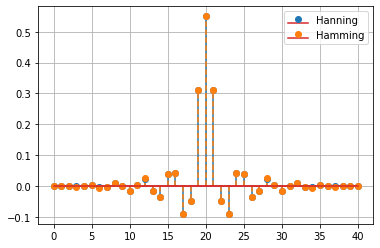

In [70]:
# Aplicando ventanas 

w1 = np.hanning(M)
w2 = np.hamming(M)

hn1 = hn * w1
hn2 = hn * w2

fig = plt.figure()
plt.stem(hn1,label='Hanning')
plt.stem(hn2,linefmt='C1--',markerfmt='C1o',label='Hamming')
plt.grid('on')
plt.legend()

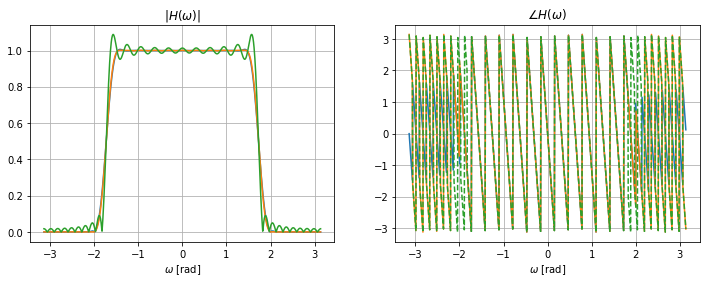

In [74]:
# Respuesta en frecuencia

N = 1024
Hw1 = np.fft.fft(hn1,N)
Hw2 = np.fft.fft(hn2,N)

Hw1 = np.fft.fftshift(Hw1)
Hw2 = np.fft.fftshift(Hw2)

fig = plt.figure(figsize=[12,4])

plt.subplot(1,2,1)
plt.plot(w,np.abs(Hw1))
plt.plot(w,np.abs(Hw2))
plt.plot(w,np.abs(Hw),'-')
plt.xlabel('$\omega$ [rad]')
plt.title('$|H(\omega)|$')
plt.grid('on')

plt.subplot(1,2,2)
plt.plot(w,np.angle(Hw1))
plt.plot(w,np.angle(Hw2))
plt.plot(w,np.angle(Hw),'--')
plt.xlabel('$\omega$ [rad]')
plt.title('$\\angle H(\omega)$')
plt.grid('on')
